In [1]:
import numpy as np
import pandas as pd

In [5]:
import os
#os.chdir()
os.getcwd()

'C:\\Users\\innoc\\Program\\kaggle'

In [9]:
# -----------------------------------
# 学習データ、テストデータの読み込み
# -----------------------------------


# 学習データ、テストデータの読み込み
train = pd.read_csv('kagglebook-master/input/ch01-titanic/train.csv')
test = pd.read_csv('kagglebook-master/input/ch01-titanic/test.csv')

# 学習データを特徴量と目的変数に分ける
train_x = train.drop(['Survived'], axis=1)
train_y = train['Survived']

# テストデータは特徴量のみなので、そのままでよい
test_x = test.copy()

In [10]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [11]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [12]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [15]:
pd.DataFrame(train.isnull().sum())

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [17]:
pd.DataFrame(test.isnull().sum())

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [18]:
# -----------------------------------
# 特徴量作成
# -----------------------------------
from sklearn.preprocessing import LabelEncoder

# 変数PassengerIdを除外する
train_x = train_x.drop(['PassengerId'], axis=1)
test_x = test_x.drop(['PassengerId'], axis=1)

# 変数Name, Ticket, Cabinを除外する
train_x = train_x.drop(['Name', 'Ticket', 'Cabin'], axis=1)
test_x = test_x.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# それぞれのカテゴリ変数にlabel encodingを適用する
for c in ['Sex', 'Embarked']:
    # 学習データに基づいてどう変換するかを定める
    le = LabelEncoder()
    le.fit(train_x[c].fillna('NA'))

    # 学習データ、テストデータを変換する
    train_x[c] = le.transform(train_x[c].fillna('NA'))
    test_x[c] = le.transform(test_x[c].fillna('NA'))

In [26]:
train_x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,3
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,3
3,1,0,35.0,1,0,53.1000,3
4,3,1,35.0,0,0,8.0500,3
5,3,1,NaN,0,0,8.4583,2
6,1,1,54.0,0,0,51.8625,3
7,3,1,2.0,3,1,21.0750,3
8,3,0,27.0,0,2,11.1333,3
9,2,0,14.0,1,0,30.0708,0


In [19]:
# -----------------------------------
# モデル作成
# -----------------------------------
from xgboost import XGBClassifier

# モデルの作成および学習データを与えての学習
model = XGBClassifier(n_estimators=20, random_state=71)
model.fit(train_x, train_y)

# テストデータの予測値を確率で出力する
pred = model.predict_proba(test_x)[:, 1]

# テストデータの予測値を二値に変換する
pred_label = np.where(pred > 0.5, 1, 0)

# 提出用ファイルの作成
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': pred_label})
submission.to_csv('submission_first.csv', index=False)
# スコア：0.7799（本書中の数値と異なる可能性があります）

In [33]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


[[1 4]
 [3 2]]


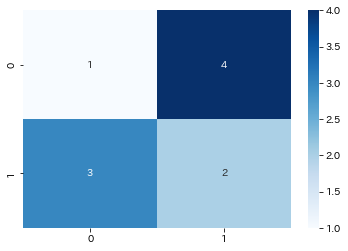

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 1, 1, 1, 0, 0, 0, 1, 1]

cm = confusion_matrix(y_true, y_pred)

print(cm)
#plt.savefig('data/dst/sklearn_confusion_matrix_annot_blues.png')
sns.heatmap(cm, annot=True, cmap='Blues')

In [20]:
# -----------------------------------
# バリデーション
# -----------------------------------
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import KFold

# 各foldのスコアを保存するリスト
scores_accuracy = []
scores_logloss = []

# クロスバリデーションを行う
# 学習データを4つに分割し、うち1つをバリデーションデータとすることを、バリデーションデータを変えて繰り返す
kf = KFold(n_splits=4, shuffle=True, random_state=71)
for tr_idx, va_idx in kf.split(train_x):
    # 学習データを学習データとバリデーションデータに分ける
    tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
    tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]

    # モデルの学習を行う
    model = XGBClassifier(n_estimators=20, random_state=71)
    model.fit(tr_x, tr_y)

    # バリデーションデータの予測値を確率で出力する
    va_pred = model.predict_proba(va_x)[:, 1]

    # バリデーションデータでのスコアを計算する
    logloss = log_loss(va_y, va_pred)
    accuracy = accuracy_score(va_y, va_pred > 0.5)

    # そのfoldのスコアを保存する
    scores_logloss.append(logloss)
    scores_accuracy.append(accuracy)

# 各foldのスコアの平均を出力する
logloss = np.mean(scores_logloss)
accuracy = np.mean(scores_accuracy)
print(f'logloss: {logloss:.4f}, accuracy: {accuracy:.4f}')
# logloss: 0.4270, accuracy: 0.8148（本書中の数値と異なる可能性があります）


logloss: 0.4270, accuracy: 0.8148


In [21]:
# -----------------------------------
# モデルチューニング
# -----------------------------------
import itertools

# チューニング候補とするパラメータを準備する
param_space = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1.0, 2.0, 4.0]
}

# 探索するハイパーパラメータの組み合わせ
param_combinations = itertools.product(param_space['max_depth'], param_space['min_child_weight'])

# 各パラメータの組み合わせ、それに対するスコアを保存するリスト
params = []
scores = []

# 各パラメータの組み合わせごとに、クロスバリデーションで評価を行う
for max_depth, min_child_weight in param_combinations:

    score_folds = []
    # クロスバリデーションを行う
    # 学習データを4つに分割し、うち1つをバリデーションデータとすることを、バリデーションデータを変えて繰り返す
    kf = KFold(n_splits=4, shuffle=True, random_state=123456)
    for tr_idx, va_idx in kf.split(train_x):
        # 学習データを学習データとバリデーションデータに分ける
        tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
        tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]

        # モデルの学習を行う
        model = XGBClassifier(n_estimators=20, random_state=71,
                              max_depth=max_depth, min_child_weight=min_child_weight)
        model.fit(tr_x, tr_y)

        # バリデーションデータでのスコアを計算し、保存する
        va_pred = model.predict_proba(va_x)[:, 1]
        logloss = log_loss(va_y, va_pred)
        score_folds.append(logloss)

    # 各foldのスコアを平均する
    score_mean = np.mean(score_folds)

    # パラメータの組み合わせ、それに対するスコアを保存する
    params.append((max_depth, min_child_weight))
    scores.append(score_mean)

# 最もスコアが良いものをベストなパラメータとする
best_idx = np.argsort(scores)[0]
best_param = params[best_idx]
print(f'max_depth: {best_param[0]}, min_child_weight: {best_param[1]}')
# max_depth=7, min_child_weight=2.0のスコアが最もよかった


max_depth: 7, min_child_weight: 2.0


In [42]:
# -----------------------------------
# ロジスティック回帰用の特徴量の作成
# -----------------------------------
from sklearn.preprocessing import OneHotEncoder

# 元データをコピーする
train_x2 = train.drop(['Survived'], axis=1)
test_x2 = test.copy()

# 変数PassengerIdを除外する
train_x2 = train_x2.drop(['PassengerId'], axis=1)
test_x2 = test_x2.drop(['PassengerId'], axis=1)

# 変数Name, Ticket, Cabinを除外する
train_x2 = train_x2.drop(['Name', 'Ticket', 'Cabin'], axis=1)
test_x2 = test_x2.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# one-hot encodingを行う
cat_cols = ['Sex', 'Embarked', 'Pclass']
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore') #categories='auto', 
ohe.fit(train_x2[cat_cols].fillna('NA'))

# one-hot encodingのダミー変数の列名を作成する
ohe_columns = []
for i, c in enumerate(cat_cols):
    ohe_columns += [f'{c}_{v}' for v in ohe.categories_[i]]

# one-hot encodingによる変換を行う
ohe_train_x2 = pd.DataFrame(ohe.transform(train_x2[cat_cols].fillna('NA')), columns=ohe_columns)
ohe_test_x2 = pd.DataFrame(ohe.transform(test_x2[cat_cols].fillna('NA')), columns=ohe_columns)

# one-hot encoding済みの変数を除外する
train_x2 = train_x2.drop(cat_cols, axis=1)
test_x2 = test_x2.drop(cat_cols, axis=1)

# one-hot encodingで変換された変数を結合する
train_x2 = pd.concat([train_x2, ohe_train_x2], axis=1)
test_x2 = pd.concat([test_x2, ohe_test_x2], axis=1)

# 数値変数の欠損値を学習データの平均で埋める
num_cols = ['Age', 'SibSp', 'Parch', 'Fare']
for col in num_cols:
    train_x2[col].fillna(train_x2[col].mean(), inplace=True)
    test_x2[col].fillna(train_x2[col].mean(), inplace=True)

# 変数Fareを対数変換する
train_x2['Fare'] = np.log1p(train_x2['Fare'])
test_x2['Fare'] = np.log1p(test_x2['Fare'])

ValueError: could not convert string to float: 'Q'

In [ ]:
# -----------------------------------
# アンサンブル
# -----------------------------------
from sklearn.linear_model import LogisticRegression

# xgboostモデル
model_xgb = XGBClassifier(n_estimators=20, random_state=71)
model_xgb.fit(train_x, train_y)
pred_xgb = model_xgb.predict_proba(test_x)[:, 1]

# ロジスティック回帰モデル
# xgboostモデルとは異なる特徴量を入れる必要があるので、別途train_x2, test_x2を作成した
model_lr = LogisticRegression(solver='lbfgs', max_iter=300)
model_lr.fit(train_x2, train_y)
pred_lr = model_lr.predict_proba(test_x2)[:, 1]

# 予測値の加重平均をとる
pred = pred_xgb * 0.8 + pred_lr * 0.2
pred_label = np.where(pred > 0.5, 1, 0)